In [2]:
import pandas as pd
import os

import sys
sys.path.append("..")
import scripts.bcc_utilities as bcc

In [8]:
class_count = {
    'source': [],
    'blood_cell': [],
}

for source in bcc.SOURCES:
    for current_dir, _, files_list in os.walk(f'../data/images/00-original_data/{source}'):
        for file in files_list:
            blood_cell = bcc.split_path(current_dir)[-1].lower()

            if bcc.file_is_a(file, bcc.IMG_EXTS):
                # Images in kaggle dataset may be miss sorted
                # We have to get file name prefix to ensure proper sort
                if source == 'kaggle':
                    blood_cell = file.split('_')[0].lower()
                
                if blood_cell in bcc.TRANSFORMS[source].keys():
                    class_count['source'].append(source)
                    class_count['blood_cell'].append(blood_cell)

class_count = pd.DataFrame(class_count)
class_count.to_csv('../data/eda_results/original_class_count.csv')

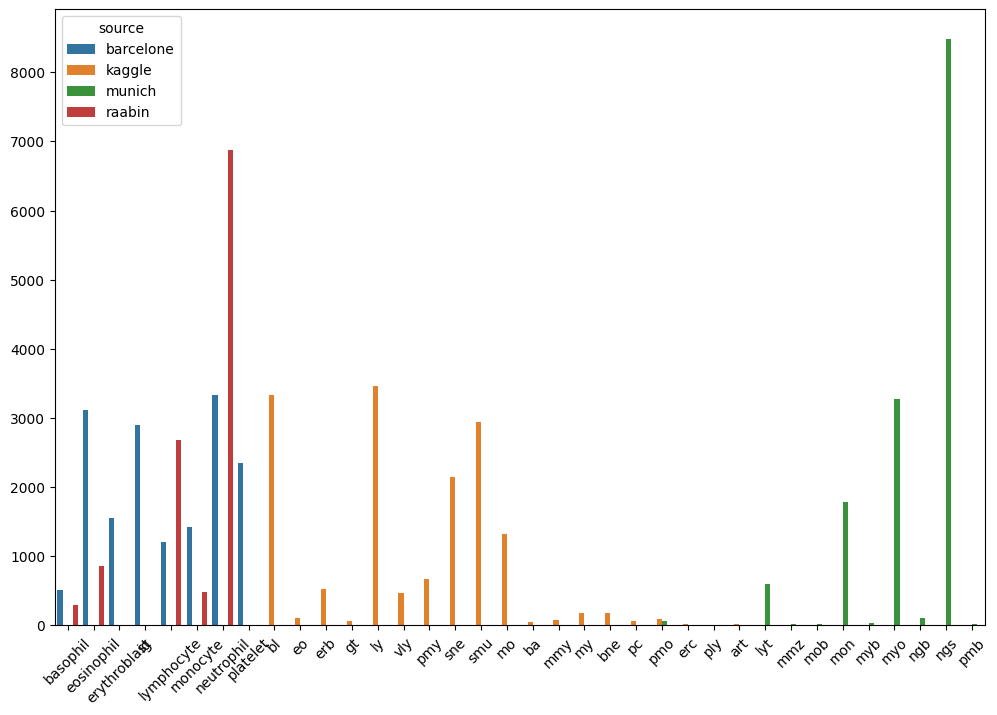

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(class_count, x='blood_cell', hue='source')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.savefig('../data/eda_results/original_class.png')
plt.show();

In [42]:
class_count['new_class'] = class_count.apply(lambda bc: bcc.BLOOD_CELL_ENCODER[bcc.TRANSFORMS[bc.loc['source']][bc.loc['blood_cell']]], axis=1)
class_count.new_class.unique()

array(['bas', 'eos', 'ery', 'img', 'lym', 'mon', 'neu', 'plt', 'myb',
       'art'], dtype=object)

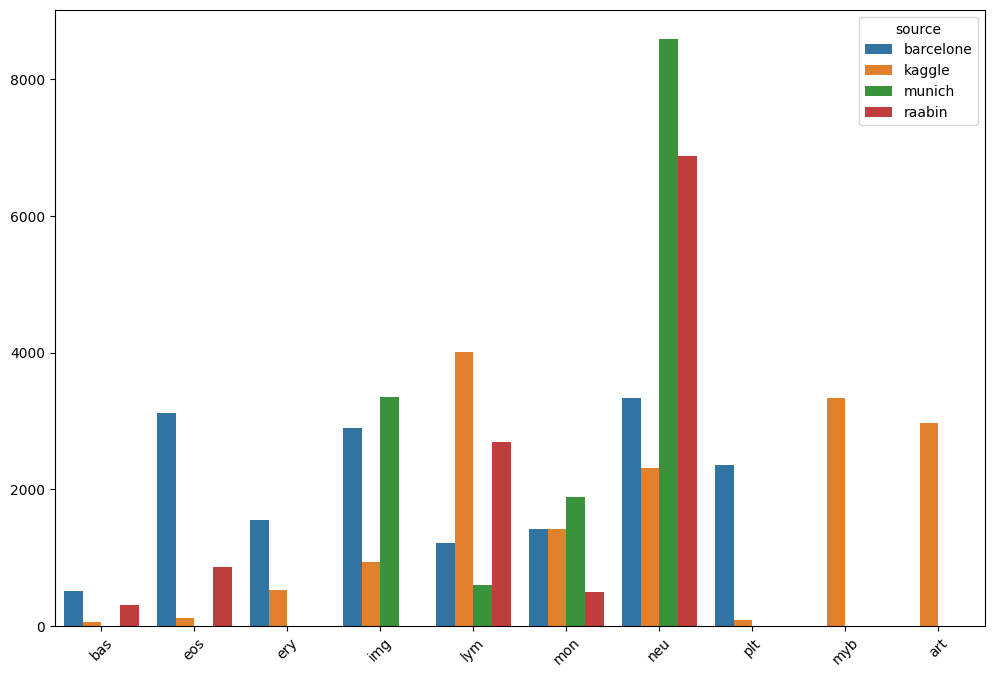

In [47]:
plt.figure(figsize=(12, 8))
sns.countplot(class_count, x='new_class', hue='source')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.savefig('../data/eda_results/recategorisation.png')
plt.show();